<a href="https://colab.research.google.com/github/maheer23/Machine-Learning-Notes/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt

### Simple Linear Regression:

- Allows to understand the **Relationship** between two **Continuous Variables.**
- **Examples:**
    - x : Independent Variable
        - Weight
    - y : Dependent Variable
        - Height
- $y = \alpha x + \beta$

### Aim of Linear Regression.

- Minimize the distance between the points and the line ($y = \alpha x + \beta$).
- Adjusting:
    - Coefficient: $\alpha$
    - Bias/intercept: $\beta$

## Building a Linear Regression Model with PyTorch:

### Example

- Coefficient: \alpha = 2
- Bias/intercept: \beta = 1
- Equation: y = 2x + 1

 

### Building a Toy Dataset:

In [2]:
# Creating a list of values from 0 to 11
x = [i for i in range(11)]
x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

**Convert a list of array into numpy arrays**

In [3]:
x_train = np.array(x,dtype= np.float32)

x_train.shape

(11,)

**Convert into 2D array**
If you don't this you will get an error stating you need 2D. Simply just reshape accordingly if you ever face such errors down the road.

In [4]:
x_train = x_train.reshape(-1,1)

x_train.shape

(11, 1)

**Create a list of y values:**

We want y values for every x value we have above.

$y = 2x + 1$

In [5]:
y = [(2*i+1) for i in x]

y

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

**Convert it into NumPy Array and reshape to 2D:**

In [6]:
y_train = np.array(y,dtype= np.float32)

y_train = y_train.reshape(-1,1)

y_train.shape

(11, 1)

### Building a Model:

**Create Model:**

1. Linear model
    - True Equation: $y = 2x + 1$
2. Forward
    - Example
        - Input $x = 1$
        - Output $\hat y = ?$

In [7]:
class LinearRegression(nn.Module):
  def __init__(self,input_dim, output_dim):
    super(LinearRegression, self).__init__()
    self.linear = nn.Linear(input_dim, output_dim)
  
  def forward(self, x):
    out = self.linear(x)
    return out

**Insantiate Model class**:

- input: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
- desired output: [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [8]:
input_dim = 1
output_dim = 1

model = LinearRegression(input_dim, output_dim)

**Insantiate Loss class**

- MSE Loss: Mean Squared Error
- MSE = $\frac{1}{n} \sum_{i=1}^n(\hat y_i - y_i)^2$
    - $\hat y$: prediction
    - $y$: true value

In [9]:
criterion = nn.MSELoss()

**Instantiate Optimizer Class:**

- Simplified equation
    - $\theta = \theta - \eta \cdot \nabla_\theta$
        - $\theta:$ parameters (our variables)
        - $\eta$: learning rate (how fast we want to learn)
        - $\nabla_\theta$: parameters' gradients
- Even simplier equation
    - `parameters = parameters - learning_rate * parameters_gradients`
        - parameters: $\alpha$ and $\beta$ in $y = \alpha x + \beta$
        - desired parameters: $\alpha = 2$ and $\beta = 1$ in $y = 2x + 1$

In [10]:
learning_rate = 0.01

optim = torch.optim.SGD(model.parameters(), lr = learning_rate)

### Train a Model:

1 epoch: going through the whole x_train data once

- 100 epochs:
    - 100x mapping `x_train = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]`
- **Process:**
    1. Convert inputs/labels into tensors with gradients.
    2. Clear Gradient Buffers.
    3. Get outputs from given inputs.
    4. Get the Loss.
    5. Get Gradients w.r.t the Parameters.
    6. Update the Parameters using Gradiens.

        `parameters = parameters - learning_rate * parameters_gradients`

    7. Repeat
    

**Use GPU for the model**

In [11]:
#device = torch.device('cuda' if torch.cuda.is_available else 'cpu')
#model.to(device)

In [12]:
epochs = 100

for epoch in range(epochs):
  epoch+=1

  # Convert numpt variable into tensor with gradients
  # inputs = torch.from_numpy(x_train).to(device)
  # labels = torch.from_numpy(y_train).to(device)

  inputs = torch.from_numpy(x_train).requires_grad_()
  labels = torch.from_numpy(y_train)

  # clear the gradients w.r.t Paramters.
  optim.zero_grad()

  # Forward to get output:
  output = model(inputs)

  # Calcualte the loss
  loss = criterion(output, labels)

  # Getting Gradients w.r.t Parameters.
  loss.backward()

  # Update the Parameters.
  optim.step()

  # Logging
  print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 1, loss 47.88352966308594
epoch 2, loss 3.9125266075134277
epoch 3, loss 0.32587307691574097
epoch 4, loss 0.03324589878320694
epoch 5, loss 0.009302987717092037
epoch 6, loss 0.007276371121406555
epoch 7, loss 0.007038334384560585
epoch 8, loss 0.00694690179079771
epoch 9, loss 0.006868313532322645
epoch 10, loss 0.00679154135286808
epoch 11, loss 0.006715713068842888
epoch 12, loss 0.006640678737312555
epoch 13, loss 0.006566544994711876
epoch 14, loss 0.006493210792541504
epoch 15, loss 0.00642069848254323
epoch 16, loss 0.006348979193717241
epoch 17, loss 0.006278103217482567
epoch 18, loss 0.006207993254065514
epoch 19, loss 0.0061386870220303535
epoch 20, loss 0.006070141214877367
epoch 21, loss 0.006002355832606554
epoch 22, loss 0.005935305263847113
epoch 23, loss 0.005869037937372923
epoch 24, loss 0.005803501699119806
epoch 25, loss 0.0057387021370232105
epoch 26, loss 0.005674609448760748
epoch 27, loss 0.0056112646125257015
epoch 28, loss 0.005548568908125162
epoch 29

**Looking at the Predicted values**

In [14]:
# Purely inference
predicted = model(torch.from_numpy(x_train).requires_grad_()).data.numpy()
predicted

array([[ 1.0924866],
       [ 3.0791678],
       [ 5.065849 ],
       [ 7.0525303],
       [ 9.039211 ],
       [11.025892 ],
       [13.012573 ],
       [14.999254 ],
       [16.985935 ],
       [18.972618 ],
       [20.9593   ]], dtype=float32)

**Plot of Predicted and Actual Values:**

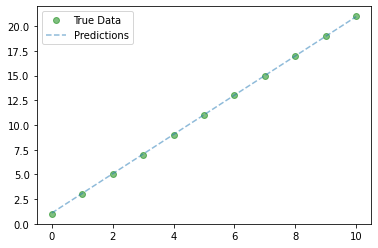

In [15]:
# Clear Figure:
plt.clf()

# Plot True Data
plt.plot(x_train, y_train, 'go', label = 'True Data', alpha = 0.5)

# PLot predictions
plt.plot(x_train, predicted, '--', label = 'Predictions', alpha = 0.5)

# Legend and plot
plt.legend(loc = 'best')
plt.show()

**Save Model:**

In [16]:
save_model = False
if save_model is True:
  # Saves only parameters
    # alpha & beta
    torch.save(model.state_dict(),'model.pkl')

**Load Model:**

In [17]:
load_model = False
if load_model is True:
  model.load_state_dict(torch.load('model.pkl'))

## Summary:

* Simple linear regression basics
  * y = Ax + B
  * y = 2x + 1
* Example of simple linear regression
* Aim of linear regression
  * Minimizing distance between the points and the line
    * Calculate "distance" through `MSE`
    * Calculate `gradients`
    * Update parameters with `parameters = parameters - learning_rate * gradients`
    * Slowly update parameters A and B model the linear relationship between y and x of the form y = 2x + 1
* Built a linear regression model in CPU and GPU
  * Step 1: Create Model Class
  * Step 2: Instantiate Model Class
  * Step 3: Instantiate Loss Class
  * Step 4: Instantiate Optimizer Class
  * Step 5: Train Model
* Important things to be on GPU
  * model
  * tensors with gradients
* How to bring to GPU?
  * `model_name.to(device)`
  * `variable_name.to(device`